In [24]:
%matplotlib inline
import yt
import numpy as np
import matplotlib.pyplot as plt
from galaxy_analysis import Galaxy

/home/aemerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 4

/home/aemerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", li

/home/aemerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, i

In [79]:
colors   = {'massive_star_winds' : 'black', 'AGB_winds' : 'C1', 'SN' : 'C4', 'other_stars' : 'black'}
markers  = {'massive_star_winds' : '*',     'AGB_winds' : 'D', 'SN' : '*', 'other_stars' : '.'}
ps       = {'massive_star_winds' : 20, 'AGB_winds' : 100, 'SN' : 40, 'other_stars' : 10}

In [26]:
#ds = yt.load('./../example_data/DD0401/DD0401')
#data = ds.all_data()

gal = Galaxy('DD0401', wdir = './../example_data/')

Parsing Hierarchy : 100%|██████████| 3088/3088 [00:00<00:00, 46370.46it/s]
/home/aemerick/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
141 abundance ratio fields defined
141 particle abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 3088/3088 [00:00<00:00, 44787.36it/s]
/home/aemerick/code/onezone/data_tables.py:89: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:


In [27]:
data = gal.df

In [73]:
gal.ds.derived_field_list

[('all', 'age'),
 ('all', 'birth_mass'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_As_fraction'),
 ('all', 'particle_Ba_fraction'),
 ('all', 'particle_C_fraction'),
 ('all', 'particle_Ca_fraction'),
 ('all', 'particle_Fe_fraction'),
 ('all', 'particle_H_fraction'),
 ('all', 'particle_He_fraction'),
 ('all', 'particle_Mg_fraction'),
 ('all', 'particle_Mn_fraction'),
 ('all', 'particle_N_fraction'),
 ('all', 'particle_Na_fraction'),
 ('all', 'particle_Ni_fraction'),
 ('all', 'particle_O_fraction'),
 ('all', 'particle_S_fraction'),
 ('all', 'particle_Si_fraction'),
 ('all', 'particle_Sr_fraction'),
 ('all', 'particle_Y_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particl

In [64]:
M            = data['birth_mass']
t_o          = data['creation_time'].convert_to_units('Myr')
MS_lifetime  = data[('io','particle_model_lifetime')].to('Myr')
MS_death     = t_o + MS_lifetime
px           = (data['particle_position_x'] - gal.ds.domain_center[0]).to('pc')
py           = (data['particle_position_y'] - gal.ds.domain_center[1]).to('pc')
pz           = (data['particle_position_z'] - gal.ds.domain_center[2]).to('pc')

recent_death = (MS_death > ds.current_time - dt) * (MS_death <= ds.current_time + 0.001*yt.units.Myr)
alive        = MS_death > ds.current_time + 0.001*yt.units.Myr

AGB           = M < 8.0
massive_star  = (M > 8.0) * (M < 25.0)


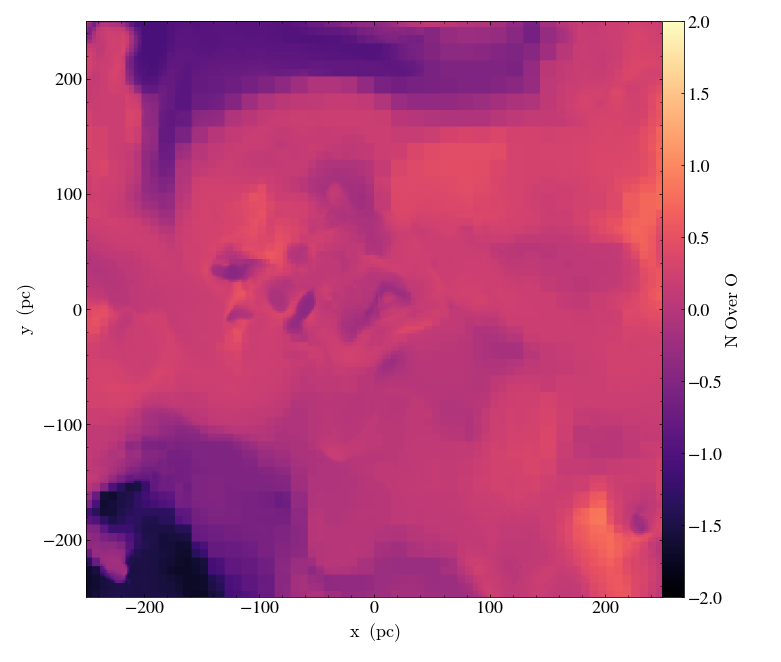
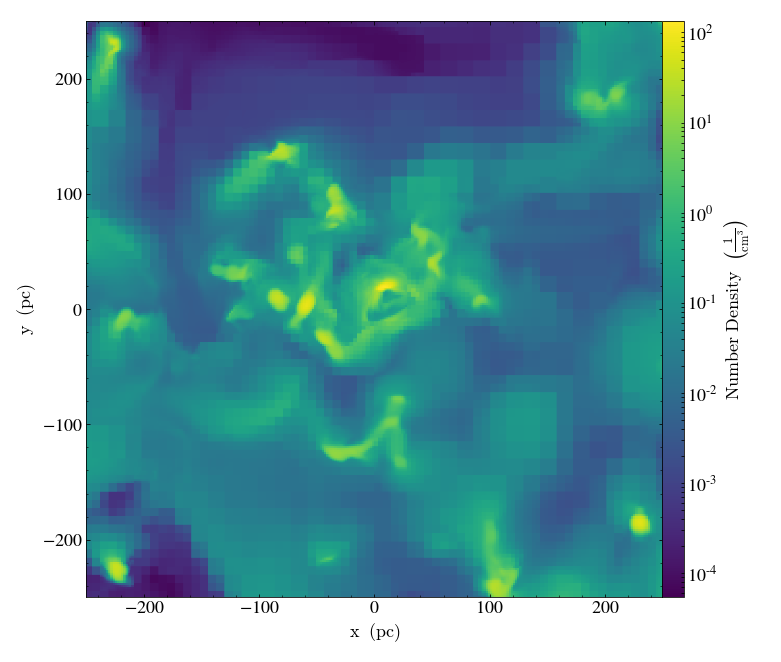
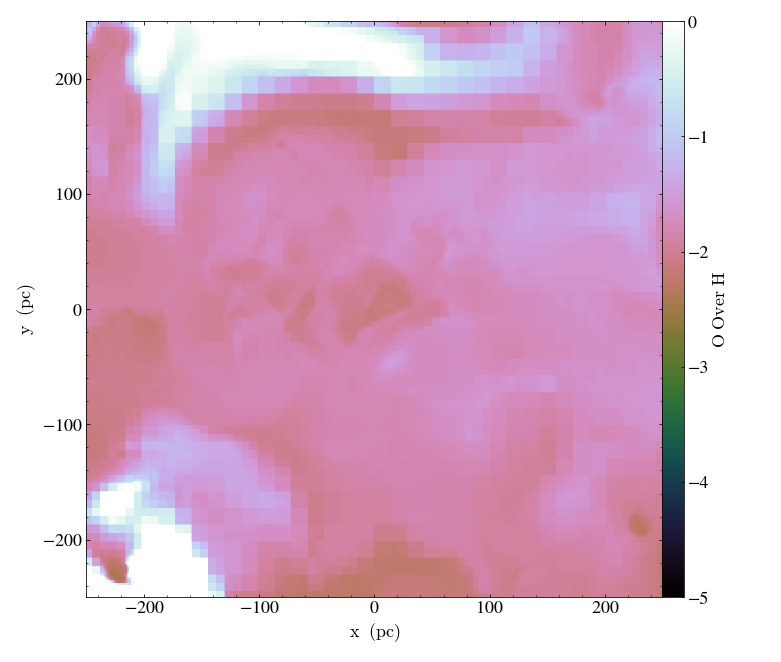

In [77]:
width = 500.0

boxdim = np.array([width*1.25,width*1.25,30.0])*yt.units.pc
region = gal.ds.box(ds.domain_center - boxdim*0.5, ds.domain_center + boxdim*0.5)

proj = yt.ProjectionPlot(gal.ds, 'z', ['number_density','N_over_O','O_over_H'], 
                        weight_field = 'number_density', data_source = region, width = (width,'pc'))
proj.set_unit('number_density','cm**(-3)')
proj.set_cmap('number_density','viridis')

proj.set_cmap('N_over_O','magma')
proj.set_zlim('N_over_O',-2,2)
proj.set_log('N_over_O',False)

proj.set_cmap('O_over_H','cubehelix')
proj.set_zlim('O_over_H',-5,0)
proj.set_log('O_over_H',False)

dt = 5.0 * yt.units.Myr

in_image     = (np.abs(pz) <= boxdim[2]*0.5) * (np.abs(px) <= width*0.5) * (np.abs(py) <= width*0.5)

proj.show()

1 Particles in  AGB_winds [ 218.68010222] pc [-197.64468402] pc
No particles in  SN
4 Particles in  massive_star_winds [  8.63663388  11.28849799  10.37337861  10.24681363] pc [ 10.70303672  12.47341914  14.28900076  14.07335101] pc
1 Particles in  AGB_winds [ 218.68010222] pc [-197.64468402] pc
No particles in  SN
4 Particles in  massive_star_winds [  8.63663388  11.28849799  10.37337861  10.24681363] pc [ 10.70303672  12.47341914  14.28900076  14.07335101] pc
1 Particles in  AGB_winds [ 218.68010222] pc [-197.64468402] pc
No particles in  SN
4 Particles in  massive_star_winds [  8.63663388  11.28849799  10.37337861  10.24681363] pc [ 10.70303672  12.47341914  14.28900076  14.07335101] pc



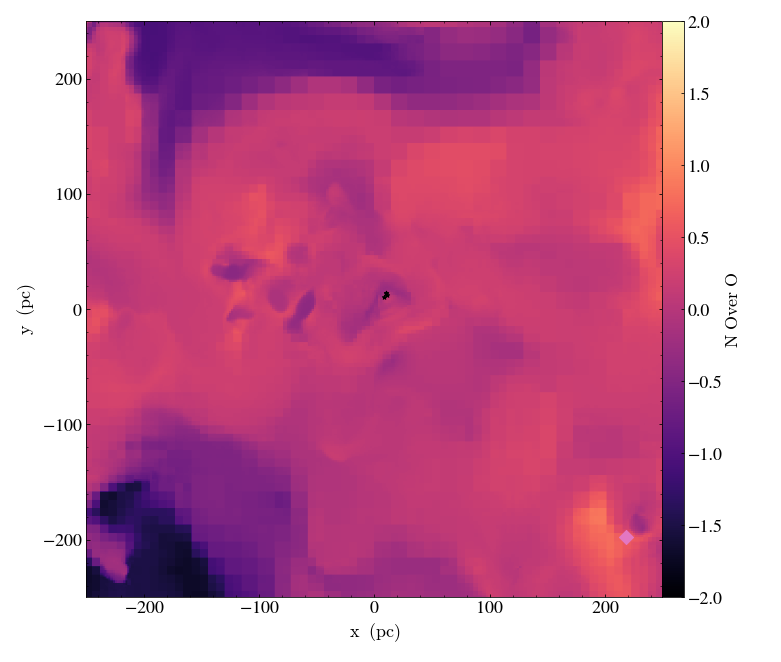
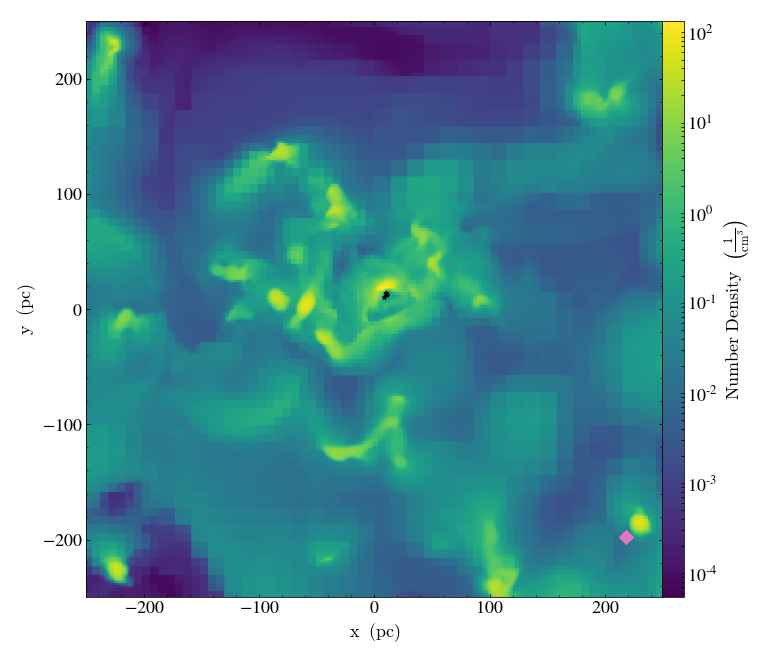
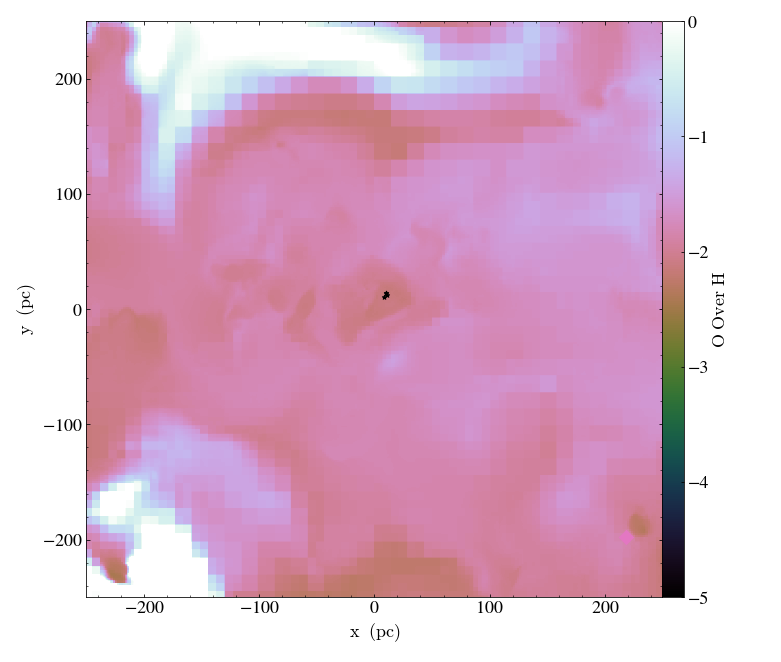

In [78]:

pp = {}
pp['massive_star_winds'] = in_image * alive * massive_star
pp['AGB_winds']          = in_image * recent_death * AGB
pp['SN']                 = in_image * recent_death * massive_star
#pp['other_stars']        = in_image * alive * (np.logical_not(pp['massive_star_winds']))

for k in proj.plots.keys():
    image = proj.plots[k]
    
    #
    # Now select and annotate the points we want
    #
    for s in pp.keys():
        if np.size(px[pp[s]].value) > 0:
            print np.size(px[pp[s]]), 'Particles in ', s, px[pp[s]], py[pp[s]]
            image.axes.scatter(px[pp[s]].value,py[pp[s]].value, s = ps[s], marker = markers[s], color = colors[s])
        else:
            print 'No particles in ', s
proj.show()

In [70]:
np.min(data['particle_position_x'])

0.491358217208 code_length